In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset 2: Bank_Full

Bajado desde kaggle: https://www.kaggle.com/datasets/hariharanpavan/bank-marketing-dataset-analysis-classification

In [2]:
df=pd.read_csv('bank-full.csv', error_bad_lines=False, sep=';')
df.head()

C:\Users\saave\AppData\Local\Temp\ipykernel_3156\653638877.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv('bank-full.csv', error_bad_lines=False, sep=';')


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Abstract

Los datos están relacionados con campañas de marketing directo (llamadas telefónicas) de una entidad bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario a plazo) estaría ('sí') o no ('no') suscrito, esto representado en la columna 'y' de la data.

#### Resumen de los atributos:

* Edad Edad del cliente
* Trabajo Trabajo del cliente
* Marcial Estado marcial del cliente
* Educación Nivel de educación del cliente
* Incumplimiento ¿Tiene el crédito en incumplimiento?
* Vivienda Si el cliente tiene préstamo de vivienda
* Préstamo Tiene Préstamo Personal
* Saldo Saldo individual del cliente
* Contacto Tipo de comunicación
* Mes Último contacto mes del año
* Día Último día de contacto de la semana
* Duración Duración del último contacto, en segundos
* Campaña Número de contactos realizados durante esta campaña y para este cliente
* Pdays Número de días que transcurrieron desde la última vez que se contactó al cliente de una campaña anterior
* Anterior Número de contactos realizados antes de esta campaña y para este cliente
* Poutcome resultado de la campaña de marketing anterior

#### Preguntas ------- Parte 1

* Cuál es la eficiencia de la campaña?
* Los saldos en las cuentas de los clientes tienen relación con el éxito de la campaña?
* La edad de los clientes tiene relación con éxito de la campaña?
* El tiempo de las llamadas tiene relación con el éxito de la campaña?

#### Preguntas ------- Parte 2

* La posesión de un préstamo para vivienda tiene relación con éxito de la campaña?
* El estado civil del cliente tiene relación con éxito de la campaña?
* Que el cliente tenga inclumimiento en su crédito tiene relación con éxito de la campaña?

#### Hipótesis

Las variables con mayor incidencia en el éxito de la campaña son:

* Tiempo de llamadas
* Cantidad de llamadas, más de 2
* Saldo en cuenta mayor a 733 (balance)
* Clientes que no posean inclumplimientos en sus prestamos (default)

#### Recomendaciones Preliminares (sujetas a posteriores validaciones)

Para mejorar la eficiencia de la campaña (actual 12%):

Segmentar y priorizar clientes con características que la data identifica como mayor potencial de contratar el servicio. Ejemplo:

* Clientes con saldos (balance) mayores a 733.
* Clientes sin incumplimientos en sus préstamos (default)
* Clientes con estado civil casado
* Clientes sin prestamo de vivienda (housing)

Sobre las llamadas:

* Considerar que probabilidad de éxito aumenta cuando se hacen 2 a 3 llamadas al cliente
* La probabilidad aumenta cuando el tiempo de llamada supera los 426 seg

## Gráficas e Interpretaciones

### Visualización de: Edad - Balance (saldo en cuenta) - duración (tiempo llamada)

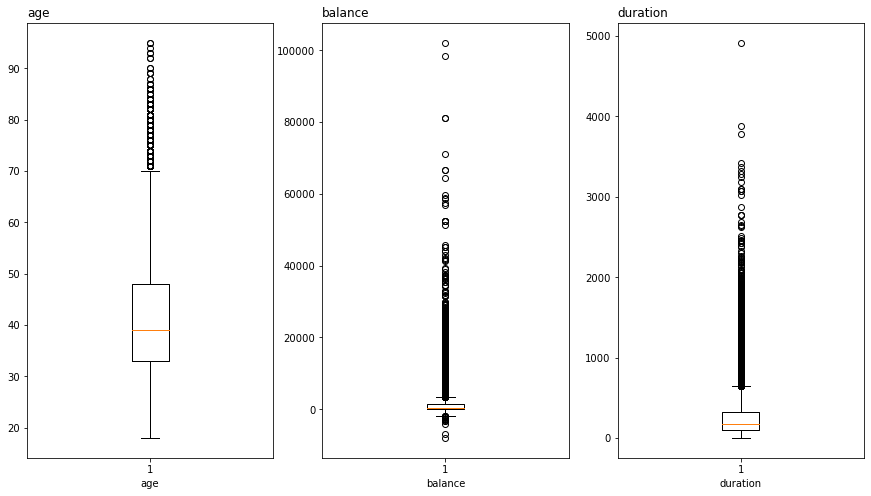

In [3]:
columnas=['age', 'balance', 'duration']

plt.figure(figsize=(15,8))
i=1
for j in range(len(columnas)):
    plt.subplot(1,len(columnas),i, xlabel=columnas[j])
    plt.boxplot(df[columnas[j]])
    plt.title(columnas[j], loc='left')
    i +=1
plt.show()

In [4]:
df[['age', 'balance', 'duration']].describe()

,age,balance,duration
count,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080
std,10.618762,3044.765829,257.527812
min,18.000000,-8019.000000,0.000000
25%,33.000000,72.000000,103.000000
50%,39.000000,448.000000,180.000000
75%,48.000000,1428.000000,319.000000
max,95.000000,102127.000000,4918.000000


Este gráfico indica que:
* Las edades de los clientes en más de un 75% son menores de 48 años
* Los balances de los clientes en su mayoría son muy bajos el 50% de los casos está bajo 448 y el 75% bajo 1.428.
* La duración de las llamadas en segundo en el 75% de los casos estuvo en torno a 319 segundos

### Distribución tiempo de llamadas

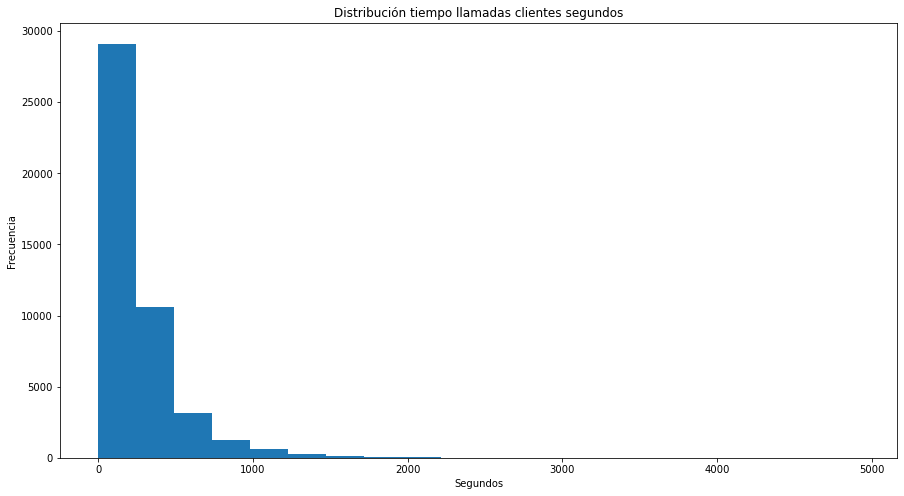

In [5]:
plt.figure(figsize=(15,8))
df['duration'].plot.hist(bins=20)
plt.title('Distribución tiempo llamadas clientes segundos')
plt.xlabel('Segundos')
plt.ylabel('Frecuencia');

In [6]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

Este gráfico indica que:
* La duración de las llamadas en segundo en el 75% de los casos estuvo en torno a 300 segundos,
* Y que en la mitad de las llamadas la duración fue de 180 o menos segundos.

### Eficiencia de la campaña medido en el % de suscripciones

In [7]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

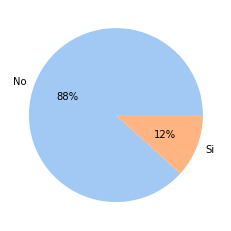

In [8]:
data = df['y'].value_counts()
labels = ['No', 'Si']

#define Seaborn color palette to use
colors = sns.color_palette('pastel')

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

#### Este gráfico indica que la tasa de éxito de la campaña es de un 12%

## Cómo afecta la edad en los casos de éxito

<AxesSubplot:xlabel='age', ylabel='y'>

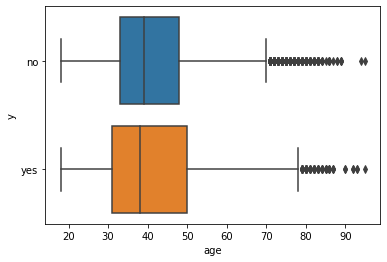

In [9]:
sns.boxplot(x=df['age'], y=df['y'], data=df)

Conclusiones del gráfico:
* El rango de edades entre las personas que toman el servicio es levemente mayor.

## Cómo afecta la duración de las llamadas en los casos de éxito

<AxesSubplot:xlabel='duration', ylabel='y'>

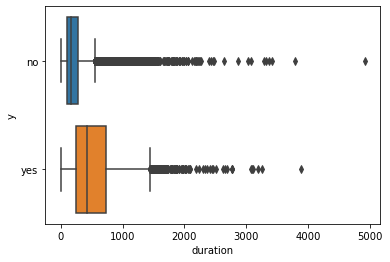

In [10]:
sns.boxplot(x=df['duration'], y=df['y'], data=df)

In [11]:
df[(df['y']=='yes')][['duration','y']].describe()

,duration
count,5289.000000
mean,537.294574
std,392.525262
min,8.000000
25%,244.000000
50%,426.000000
75%,725.000000
max,3881.000000


Conclusiones del gráfico:
* Las llamadas breves tienden a ser de casos no exitosos de venta.
* Un 50% de las ventas provino de llamadas de 426 segundos y un 75% de las ventas proviene de llamadas de 725 segundos

## Cómo afecta la cantidad de llamadas (campaign) en los casos de éxito

<AxesSubplot:xlabel='campaign', ylabel='y'>

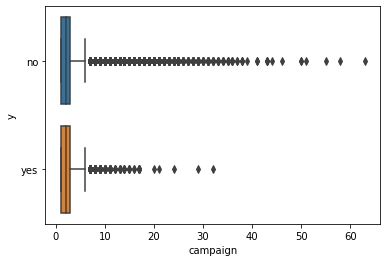

In [12]:
sns.boxplot(x=df['campaign'], y=df['y'], data=df)

In [13]:
df[(df['y']=='yes')][['campaign','y','balance']].describe()

,campaign,balance
count,5289.000000,5289.000000
mean,2.141047,1804.267915
std,1.921826,3501.104777
min,1.000000,-3058.000000
25%,1.000000,210.000000
50%,2.000000,733.000000
75%,3.000000,2159.000000
max,32.000000,81204.000000


Conclusiones del gráfico:
* El 50% de las ventas se logró sólo con 2 llamadas.
* El 75% de las ventas se logró con 3 llamdas.
* Asi mismo se nota que los clientes con mayor saldo mayor (balance > 733) requirieron más de 2 llamadas para suscribirse

## Cómo afecta la posesión de un préstamo para vivienda (housing) al éxito de la campaña?

In [14]:
df[(df['y']=='yes')][['housing','y']].value_counts()

housing  y  
no       yes    3354
yes      yes    1935
dtype: int64

In [15]:
pd.crosstab(df.housing, df.y, margins=True)

y,no,yes,All
housing,,,
no,16727,3354,20081
yes,23195,1935,25130
All,39922,5289,45211


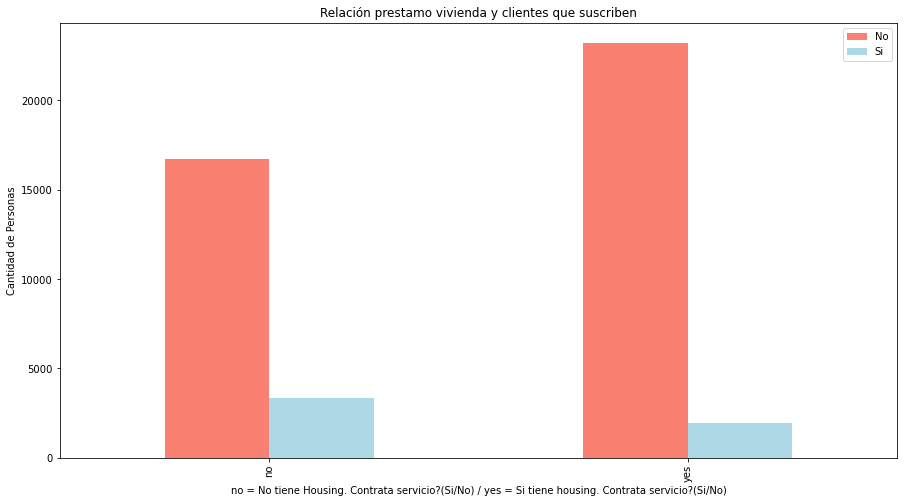

In [16]:
pd.crosstab(df.housing, df.y).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación prestamo vivienda y clientes que suscriben')
plt.xlabel('no = No tiene Housing. Contrata servicio?(Si/No) / yes = Si tiene housing. Contrata servicio?(Si/No)')
plt.ylabel('Cantidad de Personas')
plt.legend(['No', 'Si']);

Conclusiones del gráfico:

* El prestamo para vivienda (housing) no es un factor relevante para éxito de la campaña, más bien en contrario.
* Los clientes que si tienen housing y que contratan son 1935 mientras que los que NO tienen housing y contratan son 3354

## Cómo afecta la cantidad el estado civil del cliente (marital) al éxito de la campaña?

In [17]:
df['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [18]:
df[(df['y']=='yes')][['marital','y']].value_counts()

marital   y  
married   yes    2755
single    yes    1912
divorced  yes     622
dtype: int64

In [19]:
pd.crosstab(df.marital, df.y, margins=True)

y,no,yes,All
marital,,,
divorced,4585,622,5207
married,24459,2755,27214
single,10878,1912,12790
All,39922,5289,45211


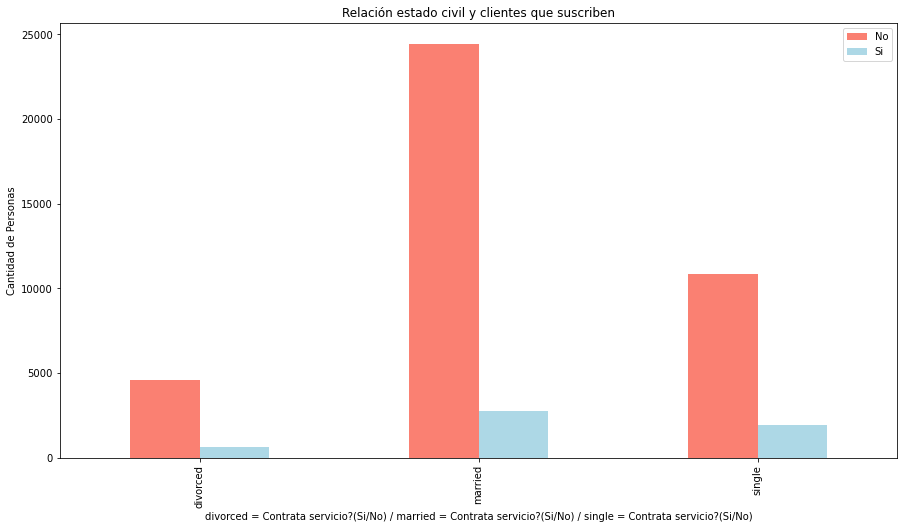

In [20]:
pd.crosstab(df.marital, df.y).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación estado civil y clientes que suscriben')
plt.xlabel('divorced = Contrata servicio?(Si/No) / married = Contrata servicio?(Si/No) / single = Contrata servicio?(Si/No)')
plt.ylabel('Cantidad de Personas')
plt.legend(['No', 'Si']);

Conclusiones del gráfico:

* Los casados son los que más suscriben seguidos por los solteros y lejos en último lugar los divorciados.

## Cómo afecta que el cliente tenga inclumimiento en su préstamo (default) al éxito de la campaña?

In [21]:
df[(df['y']=='yes')][['default','y']].value_counts()

default  y  
no       yes    5237
yes      yes      52
dtype: int64

In [22]:
pd.crosstab(df.default, df.y)

y,no,yes
default,,
no,39159,5237
yes,763,52


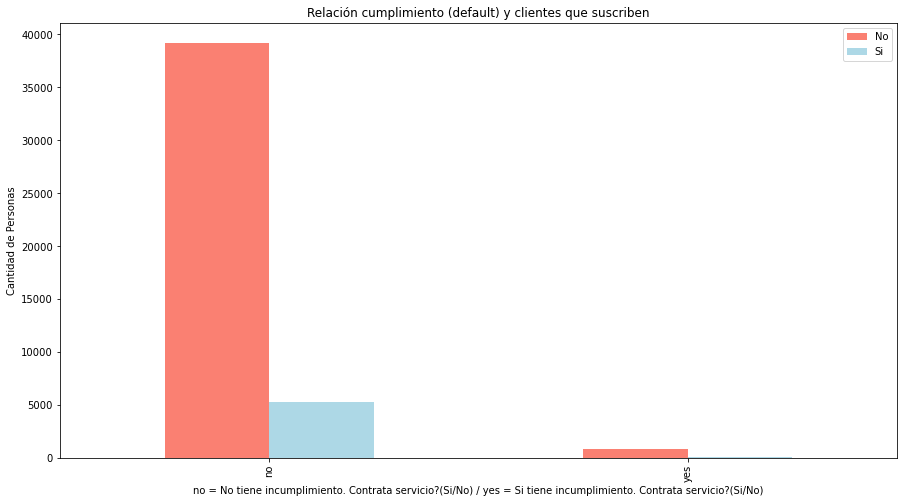

In [23]:
pd.crosstab(df.default, df.y).plot(kind='bar',
                                   color=['salmon', 'lightblue'],
                                   figsize=(15, 8))
plt.title('Relación cumplimiento (default) y clientes que suscriben')
plt.xlabel('no = No tiene incumplimiento. Contrata servicio?(Si/No) / yes = Si tiene incumplimiento. Contrata servicio?(Si/No)')
plt.ylabel('Cantidad de Personas')
plt.legend(['No', 'Si']);

Conclusiones del gráfico:

* La gran mayoria de los clientes que contratan no tienen incumplimientos (default) en sus préstamos.
* Si bien hay clientes con default que contratan el servicio, la cantidad es muy baja en torno al 1% y por lo mismo podría tratarse de moras menores.

### Distribución general de las variables numéricas

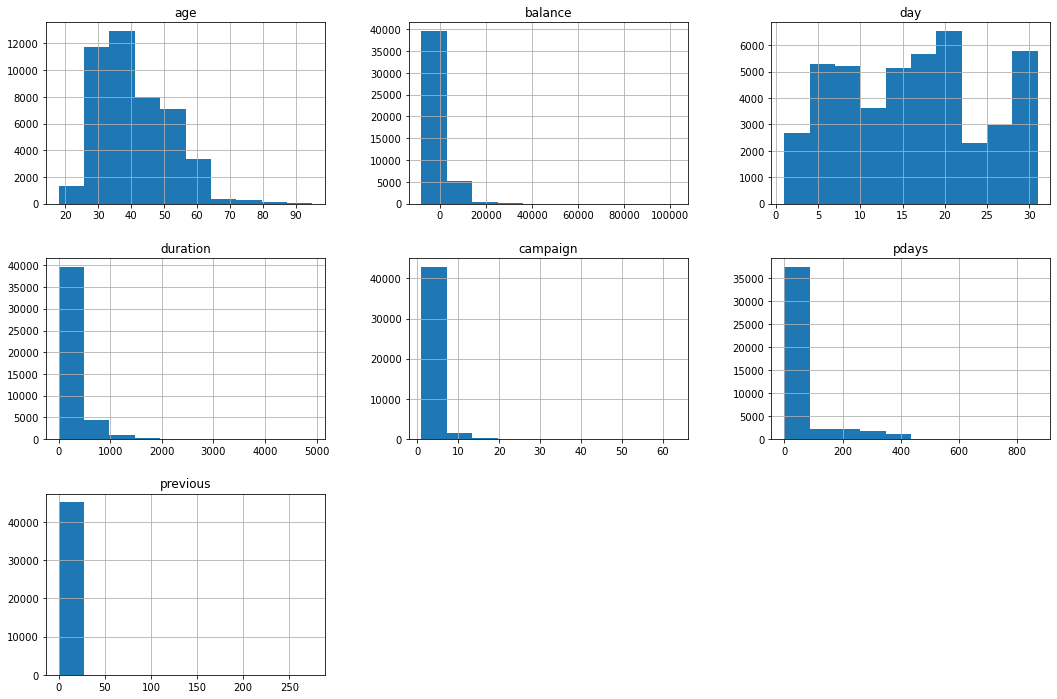

In [24]:
df_numerico = df.select_dtypes(exclude = ["object"])
df_numerico.hist(figsize=(18,12))
plt.show()

Este gráfico permite visualizar los histográmas de todas las variables numéricas de la data. 

### Preparación de datos para uso del modelo ML

Detección de valores nulos

In [29]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### Revisión de valores únicos en variables categóricas

In [30]:
def unicos(df):
    dicc={}
    for i in df.columns:
        dicc[i]=df[i].unique()
    return dicc

In [31]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
cols_cat=['job','marital','education','default','housing','loan','contact','month','poutcome','y']

In [33]:
unicosXcolumnaCategorica=unicos(df[cols_cat])

In [34]:
unicosXcolumnaCategorica

{'job': array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'housing': array(['yes', 'no'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['unknown', 'cellular', 'telephone'], dtype=object),
 'month': array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
        'mar', 'apr', 'sep'], dtype=object),
 'poutcome': array(['unknown', 'failure', 'other', 'success'], dtype=object),
 'y': array(['no', 'yes'], dtype=object)}

### Sobre las variables categóricas

* Hay variables con valores binarios y otras con 3 a 4 opciones
* Hay 10 columnas con variables categóricas
* Dado el número de variables categóricas y el número de opciones de utilizará LabelEncoder
* Se aplicará LabelEncoder a todas las variables categóricas

## Conversión de variables categóricas y selección conjunto de datos train y test

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder()

In [38]:
df[cols_cat]=df[cols_cat].apply(encoder.fit_transform)

In [39]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x=df.loc[:, df.columns != 'y']
y=df.loc[:,'y']

In [45]:
print(f'dimensiones X={x.shape} -- dimensiones Y={y.shape}')

dimensiones X=(45211, 16) -- dimensiones Y=(45211,)


In [42]:
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=123,test_size=0.3)

In [46]:
print(f'dimensiones x_train={x_train.shape} -- dimensiones y_train={y_train.shape}')

dimensiones x_train=(31647, 16) -- dimensiones y_train=(31647,)


In [47]:
print(f'dimensiones x_test={x_test.shape} -- dimensiones y_test={y_test.shape}')

dimensiones x_test=(13564, 16) -- dimensiones y_test=(13564,)


## Sobre el modelo de ML

* Dado que el proyecto plantea una predicción de compra si/no, se aplicarán modelos de clasificación.
* Como primer paso se aplicará la Regresion Logística
* Se utilizará statsmodels, y la función Logit (para Reg.Logística), para features selection
* Se aplicarán métricas pertenecientes a la Regresión Logística más la matríz de confusión
* Se hará un data frame para mostrar los valores reales y los predichos por el modelo
* Se hará una gráfica que muestre 2 curvas, la primera con valores reales (test) y los predichos por el modelo

In [43]:
from sklearn.linear_model import LogisticRegression
modelo=LogisticRegression(solver='lbfgs',max_iter=10000)
modelo.fit(x_train, y_train)
prediccion=modelo.predict(x_test)

accTrain=modelo.score(x_train, y_train)
accTest=modelo.score(x_test, y_test)
print('exactitud entrenamiento: ',accTrain)
print('exactitud test: ',accTest)

from sklearn.model_selection import cross_val_score

scores=cross_val_score(modelo, x_train, y_train, cv=20).mean()
print('exactitud valor cruzado: ',scores)

exactitud entrenamiento:  0.8913009131987234
exactitud test:  0.8908876437629017
exactitud valor cruzado:  0.8904478725842608


Como se puede ver luego de aplicar la Regresión Logística, el modelo con la data utilizada es capáz de predicir con un 89% de exactitud.

### Selección de variables con statsmodels

In [44]:
#ahora se usará la librería statsmodels
import statsmodels.api as sm

x_m=sm.add_constant(x_train)
logit=sm.Logit(y_train, x_m)
resultado=logit.fit()
resultado.summary()

Optimization terminated successfully.
         Current function value: 0.267164
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31630
Method:                           MLE   Df Model:                           16
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                  0.2624
Time:                        21:12:39   Log-Likelihood:                -8454.9
converged:                       True   LL-Null:                       -11463.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1506      0.175    -23.747      0.000      -4.493      -3.808
age            0.0096      0.002      4.805      0.000       0.006       0.014
job            0.0085      0.006      1.325      0.185      -0.004       0.021
marital        0.2462      0.037      6.640      0.000       0.174       0.319
education      0.2294      0.028      8.329      0.000       0.175       0.283
default       -0.4749      0.195     -2.432      0.015      -0.858      -0.092
balance     1.899e-05   5.57e-06      3.411      0.001    8.08e-06    2.99e-05
housing       -1.0225      0.045    -22.595      0.000      -1.111      -0.934
loan          -0.6952      0.068    -10.210      0.000      -0.829      -0.562
contact       -0.6568      0.032    -20.295      0.000      -0.720      -0.593
day           -0.0056      0.002     -2.252      0.024      -0.010      -0.001
month          0.0419      0.007      6.315      0.000       0.029       0.055
duration       0.0039   7.27e-05     54.241      0.000       0.004       0.004
campaign      -0.1358      0.012    -11.195      0.000      -0.160      -0.112
pdays          0.0036      0.000     11.821      0.000       0.003       0.004
previous       0.0844      0.010      8.600      0.000       0.065       0.104
poutcome       0.2135      0.035      6.133      0.000       0.145       0.282
==============================================================================
"""

### Resultados

* La variable job no cumple con límite de p value
* dado lo anterior se eliminará del modelo y se volverá a aplicar statsmodels

In [48]:
col=['job']

In [49]:
x_m = x_m.drop(columns=col)

logit2=sm.Logit(y_train, x_m)
resultado2=logit2.fit()
resultado2.summary()

Optimization terminated successfully.
         Current function value: 0.267191
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31631
Method:                           MLE   Df Model:                           15
Date:                Sun, 24 Jul 2022   Pseudo R-squ.:                  0.2623
Time:                        22:24:39   Log-Likelihood:                -8455.8
converged:                       True   LL-Null:                       -11463.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.1136      0.172    -23.854      0.000      -4.452      -3.776
age            0.0096      0.002      4.789      0.000       0.006       0.013
marital        0.2487      0.037      6.715      0.000       0.176       0.321
education      0.2334      0.027      8.528      0.000       0.180       0.287
default       -0.4758      0.195     -2.438      0.015      -0.858      -0.093
balance     1.898e-05   5.57e-06      3.410      0.001    8.07e-06    2.99e-05
housing       -1.0285      0.045    -22.839      0.000      -1.117      -0.940
loan          -0.6979      0.068    -10.253      0.000      -0.831      -0.564
contact       -0.6582      0.032    -20.349      0.000      -0.722      -0.595
day           -0.0055      0.002     -2.240      0.025      -0.010      -0.001
month          0.0416      0.007      6.267      0.000       0.029       0.055
duration       0.0039   7.27e-05     54.259      0.000       0.004       0.004
campaign      -0.1358      0.012    -11.198      0.000      -0.160      -0.112
pdays          0.0036      0.000     11.801      0.000       0.003       0.004
previous       0.0845      0.010      8.612      0.000       0.065       0.104
poutcome       0.2133      0.035      6.129      0.000       0.145       0.282
==============================================================================
"""

## Resultado 2do intento eliminando job

* El resultado apenas varió disminuyendo muy levemente el Pseudo R-squ
* Dado que el modelo no mejora al eliminar job, se continuará incorporando a la variable job


In [51]:
y_pred=modelo.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

## Visualización de valores predichos por el modelo versus valores reales (test)

In [52]:
compa=pd.DataFrame({'prediccion':y_pred, 'test':y_test}) #crear dataframe comparando resultado predicción vs test
compa.head(10)

,prediccion,test
7281,0,1
19469,0,0
31637,0,0
22484,0,0
35919,0,0
15644,0,0
12619,0,0
30249,0,0
11489,0,0
21513,0,0


### Aplicando matriz de confusión

In [54]:
#ahora medir la calidad de la predicción con matriz de confusión para el 30% de los datos de prueba test
#diagonal izq a der muestra datos asertados verdaderos positivos y falsos positivos
#diagonal der a izq muestra errores 1233 falsos negativos y 333 falsos positivos. total 1480 errores
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test, y_pred)
print(matriz)

[[11751   247]
 [ 1233   333]]


In [56]:
from sklearn.metrics import accuracy_score #ahora se medirá la precisión del modelo
exactitud=accuracy_score(y_test, y_pred)
print(exactitud) #esto indica que más del 89% de las predicciones son exactas

0.8908876437629017


## Gráfica predicción modelo versus test

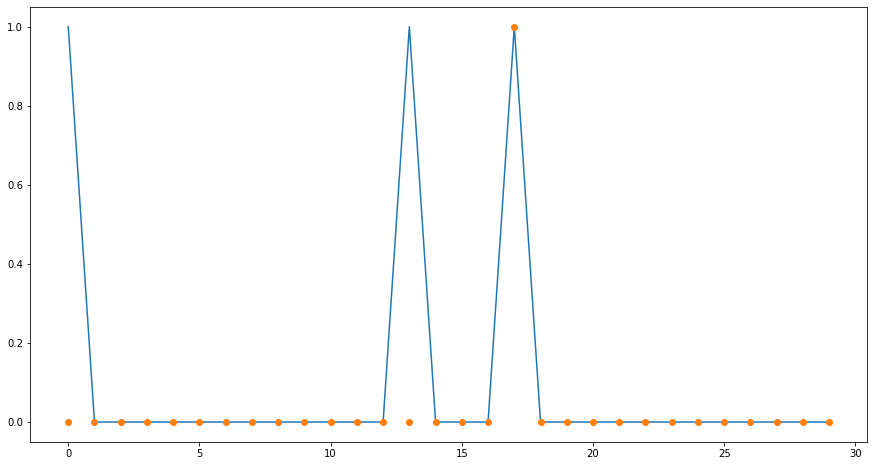

In [57]:
def plot30(y_verd, y_pred): #funcion permite ver muestra con 30 datos para tener vista zoom
    eje_x=list(range(30))
    eje_y=y_test[:30]
    eje_y2=y_pred[:30]
    fig, ax=plt.subplots()
    ax.plot(eje_x, eje_y, '-', eje_x, eje_y2, 'o')
    fig.set_size_inches(15,8)

plot30(y_test, y_pred)